<a href="https://colab.research.google.com/github/ssyyjj1012/data-analysis/blob/main/05_%EB%B6%84%EB%A5%98_(Classifications)_(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# unicode 에러
plt.rcParams['axes.unicode_minus'] = False

# 분류 (Classification)

## K Nearest Neighbors (k-최근접 이웃 분류 알고리즘)

가장 중요한 hyperparameter인 **K**값은 근처에 참고(reference)할 **이웃의 숫자**

- k-최근접 이웃 분류 알고리즘
- 가장 고전적이고 직관적인 머신러닝 분류 알고리즘
- 기하학적 거리 분류기
- 가장 **가깝게 위치하는 멤버로 분류**하는 방식

In [2]:
Image(url='https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png', width=500)

## mnist (손글씨) 데이터셋을 활용한 분류

mnist (손글씨) 데이터셋을 활용하여 0~9까지 분류하는 분류기를 만듭니다.

`sklearn.datasets` 보다 고해상도 이미지이기 때문에 `tensorflow.keras.datasets`을 활용합니다.

In [3]:
#!pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist

(x_digit, y_digit), (_, _15) = mnist.load_data()
x_digit, y_digit = x_digit[:5000], y_digit[:5000]
x_digit = x_digit.reshape(-1, 28*28)
x_digit.shape

(5000, 784)

### mnist (손글씨) 데이터 시각화

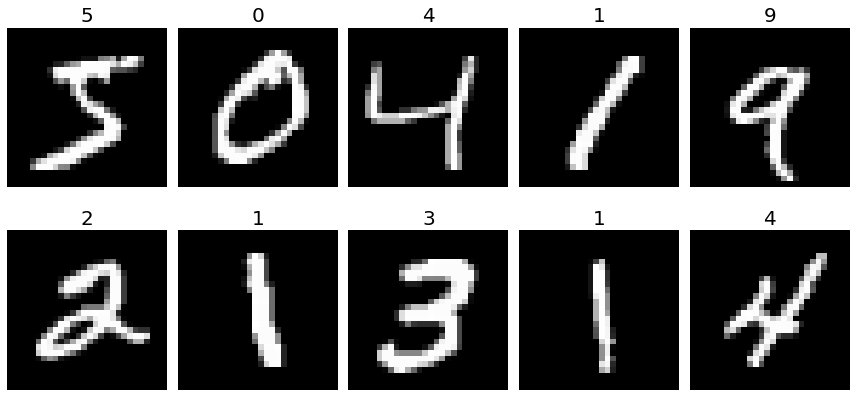

In [5]:
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w*h):
    axes[i//h, i%h].imshow(x_digit[i].reshape(-1, 28), cmap='gray')
    axes[i//h, i%h].set_title(y_digit[i], fontsize=20)
    axes[i//h, i%h].axis('off')
plt.tight_layout()
plt.show()

## 데이터 셋 분할

학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [6]:
from sklearn.model_selection import train_test_split

SEED = 123

- `random_state`에 SEED(123) 적용
- `test_size`는 0.1 로 설정
- `stratify` 옵션 지정

In [7]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(x_digit, y_digit, stratify=y_digit, random_state=SEED, test_size=0.1)

In [8]:
# 코드를 입력해 주세요
x_train.shape, x_test.shape

((4500, 784), (500, 784))

<p><strong>[출력 결과]</strong></p><pre>((4500, 784), (500, 784))</pre>

### 모델 정의

`KNeighborsClassifier`를 정의 하고 핵심 hyperparameter 인 `n_neighbors`를 지정합니다.

임의로 5개의 이웃을 보도록 `n_neighbors=5`로 지정하겠습니다.

In [9]:
# 코드를 입력해 주세요
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
knn = KNeighborsClassifier(n_neighbors=5)

### 학습 (fit)

In [10]:
# 코드를 입력해 주세요
knn.fit(x_train, y_train)

KNeighborsClassifier()

<p><strong>[출력 결과]</strong></p><pre>KNeighborsClassifier()</pre>

### 예측 (predict)

In [11]:
# 코드를 입력해 주세요
prediction = knn.predict(x_test)

### 검증 (evaluation)

정확도 (Accuracy) 산출

In [12]:
# 코드를 입력해 주세요
#(prediction == y_test).mean()
knn.score(x_test, y_test)

0.938

<p><strong>[출력 결과]</strong></p><pre>0.938</pre>

### 최적의 n_neighbors 찾기

- `k=1` ~ `k=10`까지의 정확도를 출력

In [27]:
# 코드를 입력해 주세요
for k in range(1, 11):
    # 1. 알고리즘 선언: k의 계수 설정 (hyper-parameter 설정)
    knn = KNeighborsClassifier(n_neighbors=k)
    # 2. 학습(fit)
    knn.fit(x_train, y_train)
    # 3. 예측(predict)
    pred = knn.predict(x_test)
    # 4. 정확도 계산(accuracy)
    acc = (pred == y_test).mean()
    print(f'k: {k}, accuracy: {acc*100:.2f}')

k: 1, accuracy: 95.00
k: 2, accuracy: 93.40
k: 3, accuracy: 94.40
k: 4, accuracy: 94.20
k: 5, accuracy: 94.40
k: 6, accuracy: 94.50
k: 7, accuracy: 94.50
k: 8, accuracy: 94.30
k: 9, accuracy: 94.40
k: 10, accuracy: 94.10


<p><strong>[출력 결과]</strong></p><pre>k: 1, accuracy: 94.40
k: 2, accuracy: 93.20
k: 3, accuracy: 94.20
k: 4, accuracy: 93.80
k: 5, accuracy: 93.80
k: 6, accuracy: 93.40
k: 7, accuracy: 93.80
k: 8, accuracy: 93.60
k: 9, accuracy: 94.00
k: 10, accuracy: 92.80
</pre>

## Iris 붓꽃 데이터셋을 활용한 실습

### 필요한 데이터셋 불러오기 (load_iris)

In [14]:
from sklearn.datasets import load_iris

In [15]:
# 코드를 입력해 주세요
iris = load_iris()

### 데이터프레임 (DataFrame) 만들기

`df` 변수에 데이터 프레임 생성합니다.

In [16]:
# 코드를 입력해 주세요
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target']=iris['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal length (cm)</th>
      <th>sepal width (cm)</th>
      <th>petal length (cm)</th>
      <th>petal width (cm)</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.1</td>
      <td>3.5</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4.9</td>
      <td>3.0</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4.7</td>
      <td>3.2</td>
      <td>1.3</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4.6</td>
      <td>3.1</td>
      <td>1.5</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5.0</td>
      <td>3.6</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

## 데이터 셋 분할

학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [32]:
x_digit = df.iloc[:, :4]
y_digit = df['target']

In [33]:
SEED = 123

- test_size=0.2
- random_state=SEED(123) 로 설정합니다.
- stratify 옵션을 지정합니다.

In [34]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(x_digit, y_digit, 
                                                    stratify=y_digit, 
                                                    random_state=SEED, 
                                                    test_size=0.2)

잘 로드가 되었는지 **shape를 확인**하도록 합니다.

`x_train`, `y_train` shape 출력

In [36]:
# 코드를 입력해 주세요
x_train.shape, y_train.shape

((120, 4), (120,))

<p><strong>[출력 결과]</strong></p><pre>((120, 4), (120,))</pre>

`x_test`, `y_test` shape 확인

In [37]:
# 코드를 입력해 주세요
x_test.shape, y_test.shape

((30, 4), (30,))

<p><strong>[출력 결과]</strong></p><pre>((30, 4), (30,))</pre>

### 모델 정의

In [38]:
# 코드를 입력해 주세요
knn = KNeighborsClassifier(n_neighbors=5)

### 학습 (fit)

In [39]:
# 코드를 입력해 주세요
knn.fit(x_train, y_train)

KNeighborsClassifier()

<p><strong>[출력 결과]</strong></p><pre>KNeighborsClassifier()</pre>

### 예측(predict)

예측한 결과를 `prediction` 변수에 대입합니다.

In [40]:
# 코드를 입력해 주세요
prediction = knn.predict(x_test)

### 검증 (evaluation)

예측한 결과에 대한 **정확도**를 출력합니다.

In [41]:
# 코드를 입력해 주세요
(prediction == y_test).mean()

0.9333333333333333

<p><strong>[출력 결과]</strong></p><pre>0.9333333333333333</pre>

### 최적의 k 값 찾기

k=1 ~ 10까지 중 최적의 k 값 찾기

In [42]:
# 코드를 입력해 주세요
for k in range(1, 11):
    # 1. 알고리즘 선언: k의 계수 설정 (hyper-parameter 설정)
    knn = KNeighborsClassifier(n_neighbors=k)
    # 2. 학습(fit)
    knn.fit(x_train, y_train)
    # 3. 예측(predict)
    pred = knn.predict(x_test)
    # 4. 정확도 계산(accuracy)
    acc = (pred == y_test).mean()
    print(f'k: {k}, accuracy: {acc*100:.2f}')

k: 1, accuracy: 93.33
k: 2, accuracy: 93.33
k: 3, accuracy: 93.33
k: 4, accuracy: 93.33
k: 5, accuracy: 93.33
k: 6, accuracy: 90.00
k: 7, accuracy: 90.00
k: 8, accuracy: 93.33
k: 9, accuracy: 93.33
k: 10, accuracy: 93.33


<p><strong>[출력 결과]</strong></p><pre>k: 1, accuracy: 93.33
k: 2, accuracy: 93.33
k: 3, accuracy: 93.33
k: 4, accuracy: 93.33
k: 5, accuracy: 93.33
k: 6, accuracy: 90.00
k: 7, accuracy: 90.00
k: 8, accuracy: 93.33
k: 9, accuracy: 93.33
k: 10, accuracy: 93.33
</pre>